# Linear Regression

m = [1.93939394]
b = [4.73333333]


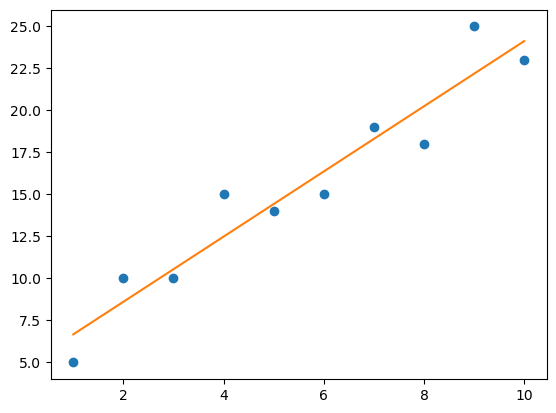

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Fit a line to the points
fit = LinearRegression().fit(X, Y)

# m = 1.7867224, b = -16.51923513
m = fit.coef_.flatten()
b = fit.intercept_.flatten()
print("m = {0}".format(m))
print("b = {0}".format(b))

# show in chart
plt.plot(X, Y, 'o') # scatterplot
plt.plot(X, m*X+b) # line
plt.show()

## M

#### m: Slope of the regression line. It represents the change in y for a one-unit change in 𝑥. In other words, it quantifies the relationship between the independent variable and the dependent variable. It tells you how much y increases or decreases when x increases by one unit.

## B
#### Intercept of the regression line. It is the predicted value of y when x is zero. It’s where the line crosses the y-axis.

In [2]:
import pandas as pd
from numpy.linalg import inv
import numpy as np

# Import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1].flatten()

# Add placeholder "1" column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).T

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Calculate coefficents for slope and intercept
b = inv(X_1.transpose() @ X_1) @ (X_1.transpose() @ Y)
print(b) # [1.93939394, 4.73333333]

# Predict against the y-values
y_predict = X_1.dot(b)

[1.93939394 4.73333333]


In [3]:
import pandas as pd
from numpy.linalg import qr, inv
import numpy as np

# Import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1].flatten()

# Add placeholder "1" column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).transpose()

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# calculate coefficents for slope and intercept
# using QR decomposition
Q, R = qr(X_1)
b = inv(R).dot(Q.transpose()).dot(Y)

print(b) # [1.93939394, 4.73333333]

[1.93939394 4.73333333]


## Gradient Descent

#### Gradient descent is an optimization technique that uses derivatives and iterations to minimize/maximize a set of parameters against an objective. To learn about gradient descent, let’s do a quick thought experiment and then apply it on a simple example.



In [4]:
from scipy.stats import t

n = 10
lower_cv = t(n-1).ppf(.025)
upper_cv = t(n-1).ppf(.975)

print(lower_cv, upper_cv)

-2.2621571628540997 2.262157162854099


In [5]:
from scipy.stats import t
from math import sqrt

# sample size
n = 10

lower_cv = t(n-1).ppf(.025)
upper_cv = t(n-1).ppf(.975)

# correlation coefficient
# derived from data https://bit.ly/2KF29Bd
r = 0.957586

# Perform the test
test_value = r / sqrt((1-r**2) / (n-2))

print("TEST VALUE: {}".format(test_value))
print("CRITICAL RANGE: {}, {}".format(lower_cv, upper_cv))

if test_value < lower_cv or test_value > upper_cv:
    print("CORRELATION PROVEN, REJECT H0")
else:
    print("CORRELATION NOT PROVEN, FAILED TO REJECT H0 ")

# Calculate p-value
if test_value > 0:
    p_value = 1.0 - t(n-1).cdf(test_value)
else:
    p_value = t(n-1).cdf(test_value)

# Two-tailed, so multiply by 2
p_value = p_value * 2
print("P-VALUE: {}".format(p_value))

TEST VALUE: 9.399564671312076
CRITICAL RANGE: -2.2621571628540997, 2.262157162854099
CORRELATION PROVEN, REJECT H0
P-VALUE: 5.9763860877914965e-06


## Coefficient of Determination
#### Let’s learn an important metric you will see a lot in statistics and machine learning regressions. The coefficient of determination, called 𝑟2, measures how much variation in one variable is explainable by the variation of the other variable. It is also the square of the correlation coefficient 𝑟. As 𝑟 approaches a perfect correlation (–1 or 1), 𝑟2 approaches 1. Essentially, 𝑟2 shows how much two variables interact with each other.

In [6]:
import pandas as pd

# Read data into Pandas dataframe
df = pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",")

# Print correlations between variables
coeff_determination = df.corr(method='pearson') ** 2
print(coeff_determination)

# OUTPUT:
#           x         y
# x  1.000000  0.916971
# y  0.916971  1.000000

          x         y
x  1.000000  0.916971
y  0.916971  1.000000


In [7]:
import pandas as pd
from scipy.stats import t
from math import sqrt

# Load the data
points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples())

n = len(points)

# Linear Regression Line
m = 1.939
b = 4.733

# Calculate Prediction Interval for x = 8.5
x_0 = 8.5
x_mean = sum(p.x for p in points) / len(points)

t_value = t(n - 2).ppf(.975)

standard_error = sqrt(sum((p.y - (m * p.x + b)) ** 2 for p in points) / (n - 2))

margin_of_error = t_value * standard_error * \
                  sqrt(1 + (1 / n) + (n * (x_0 - x_mean) ** 2) / \
                       (n * sum(p.x ** 2 for p in points) - \
                            sum(p.x for p in points) ** 2))

predicted_y = m*x_0 + b

# Calculate prediction interval
print(predicted_y - margin_of_error, predicted_y + margin_of_error)
# 16.462516875955465 25.966483124044537

16.46251687560351 25.966483124396493


In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('https://bit.ly/3cIH97A', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Separate training and testing data
# This leaves a third of the data out for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

model = LinearRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("r^2: %.3f" % result)

r^2: 0.993


In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

df = pd.read_csv('https://bit.ly/3cIH97A', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)\
Y = df.values[:, -1]

# Perform a simple linear regression
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print("MSE: mean=%.3f (stdev-%.3f)" % (results.mean(), results.std()))

[0.99337354 0.99345032 0.99251425]
MSE: mean=0.993 (stdev-0.000)


In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, ShuffleSplit

df = pd.read_csv('https://bit.ly/38XwbeB', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)\
Y = df.values[:, -1]

# Perform a simple linear regression
kfold = ShuffleSplit(n_splits=10, test_size=.33, random_state=7)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)

print(results)
print("mean=%.3f (stdev-%.3f)" % (results.mean(), results.std()))

[0.82514286 0.23552344 0.92653455 0.91620594 0.73260142 0.8698865
 0.55254014 0.89593526 0.91570078 0.82086621]
mean=0.769 (stdev-0.208)


## Exercise 1
#### Perform a simple linear regression to find the m and b values that minimizes the loss (sum of squares).

In [21]:
df = pd.read_csv("https://bit.ly/3C8JzrM")


X = df.values[:, :-1]
y = df.values[:, -1]

fit = LinearRegression().fit(X, y)

m = fit.coef_.flatten()[0]
b = fit.intercept_.flatten()[0]
print("m = {0}".format(m))
print("b = {0}".format(b))


m = 1.759193148105248
b = 4.69359654825405


In [23]:
df = pd.read_csv("https://bit.ly/3C8JzrM").itertuples()

sum_of_squares = 0.0
for val in df:
  y_actual = val.y
  y_predict = m * val.x + b
  residual = y_actual - y_predict
  residual_squared = (residual)**2
  sum_of_squares += residual_squared

print(f"Sum Of Squares: {sum_of_squares}")

Sum Of Squares: 42719.84974651069


## Exercise 2
#### Calculate the correlation coefficient and statistical significance of this data (at 95% confidence). Is the correlation useful?

In [26]:
df = pd.read_csv("https://bit.ly/3C8JzrM")
correlations = df.corr(method="pearson")
correlations

,x,y
x,1.00000,0.92421
y,0.92421,1.00000


In [27]:
from scipy.stats import t

n = 10
lower_cv = t(n-1).ppf(.025)
upper_cv = t(n-1).ppf(.975)

print(lower_cv, upper_cv)

-2.2621571628540997 2.262157162854099


In [32]:
r = correlations["y"]["x"]

test_value = r / sqrt((1 - r ** 2) / (n - 2))

print("TEST VALUE: {}".format(test_value))
print("CRITICAL RANGE: {}, {}".format(lower_cv, upper_cv))

if test_value < lower_cv or test_value > upper_cv:
    print("CORRELATION PROVEN, REJECT H0")
else:
    print("CORRELATION NOT PROVEN, FAILED TO REJECT H0 ")

# Calculate p-value
if test_value > 0:
    p_value = 1.0 - t(n - 1).cdf(test_value)
else:
    p_value = t(n - 1).cdf(test_value)

# Two-tailed, so multiply by 2
p_value = p_value * 2
print("P-VALUE: {}".format(p_value))

TEST VALUE: 6.845161076596911
CRITICAL RANGE: -2.2621571628540997, 2.262157162854099
CORRELATION PROVEN, REJECT H0
P-VALUE: 7.514012525766667e-05
